In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from helpers import *

In [14]:
plt.style.use('fivethirtyeight')

## Seteo de la presición global de representación, no afecta los cálculos

In [15]:
Presicion().cambiarPresicionRepresentacion(0.0001)
Presicion.presicionActual()

4

## Importacion de la base de datos

In [17]:
df = pd.read_excel("ejemplo.xlsx")
x_col = df.iloc[:,0]
y_col = df.iloc[:,1]
df.head()

99

## Generación de ecuaciones

In [ ]:
linear = RegresionLinear(df)
linear.imprimirEcuacion()

0.0266*x + 5.1792

In [ ]:
cuadratica = RegresionCuadratica(df)
cuadratica.imprimirEcuacion()

2.2239*x**0.2743

In [ ]:
exponencial = RegresionExponencial(df)
exponencial.imprimirEcuacion()

5.394*exp(0.0037*x)

## 1- Impresion Regresiones

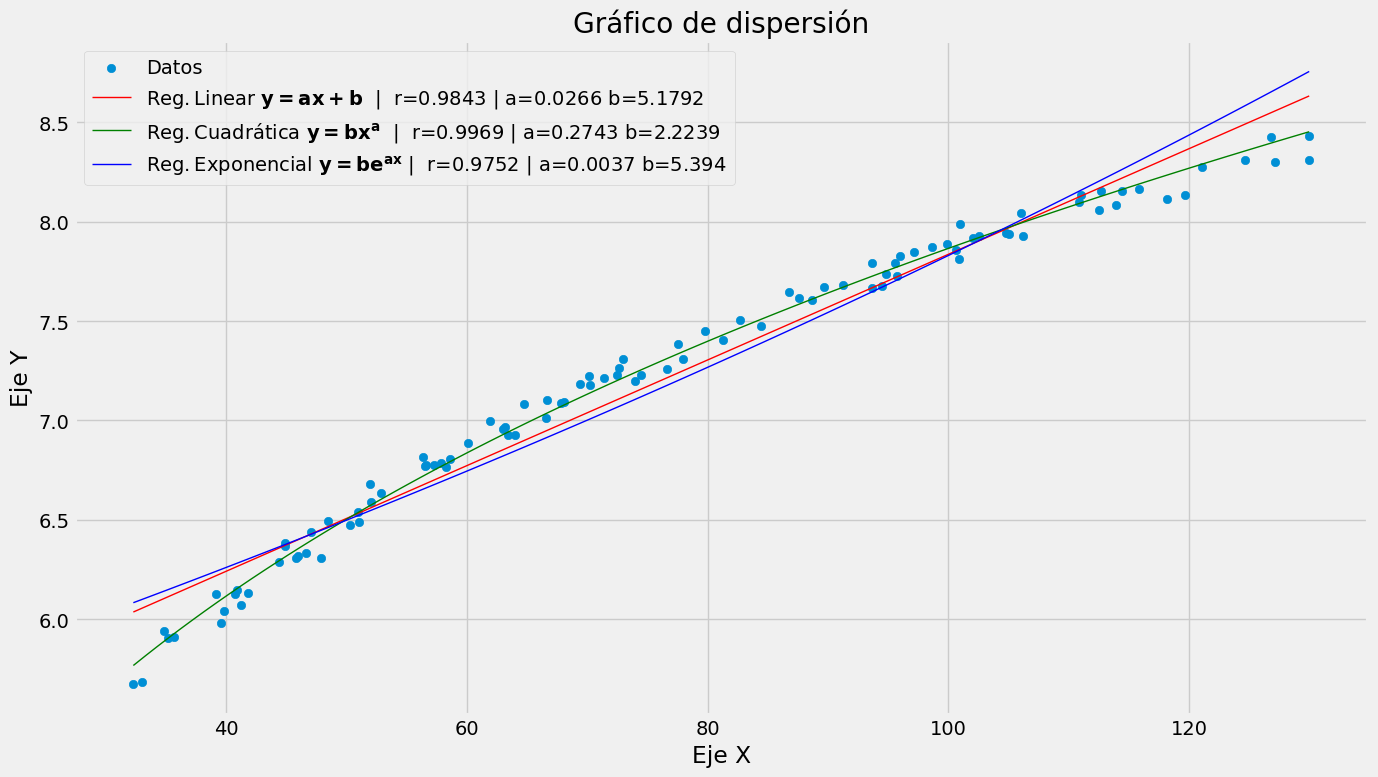

In [ ]:
plt.figure(figsize=(14, 8))

# Agregar un único eje al cual se le aplicará el gráfico
ax = plt.subplot(1, 1, 1)

# Crear valores de x para trazar las funciones
x_vals = np.linspace(df.iloc[:, 0].min(), df.iloc[:, 0].max(), 100)

# Calcular los valores de y correspondientes a las funciones
y_vals_linear = linear.obtenerEcuacion()(x_vals)
y_vals_cuadra = cuadratica.obtenerEcuacion()(x_vals)
y_vals_exp = exponencial.obtenerEcuacion()(x_vals)

# Gráfico de dispersión
ax.scatter(df.iloc[:,0],df.iloc[:,1])

# Gráfico de regresión lineal
ax.plot(x_vals, y_vals_linear, color='red', linewidth=1)

# Gráfico de regresión cuadrática
ax.plot(x_vals, y_vals_cuadra, color='green', linewidth=1)

# Gráfico de regresión exponcencial
ax.plot(x_vals, y_vals_exp, color='blue', linewidth=1)

# Textos a imprimir
linearTXT = fr"$\mathregular{{Reg. Linear}}$ $\mathbf{{ y = ax + b}}$  |  r={linear.pearsonError(True)} | a={linear.calcularM(True)} b={linear.calcularB(True)}"
cuadraTXT = fr"$\mathregular{{Reg. Cuadrática}}$ $\mathbf{{ y = bx^a }}$  |  r={cuadratica.pearsonError(True)} | a={cuadratica.calcularM(True)} b={cuadratica.calcularB(True)}"
expTXT = fr"$\mathregular{{Reg. Exponencial}}$ $\mathbf{{ y = be^{{ax}} }}$ |  r={exponencial.pearsonError(True)} | a={exponencial.calcularM(True)} b={exponencial.calcularB(True)}"

# Personalizar el gráfico
ax.set_title("Gráfico de dispersión")
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")
ax.legend(["Datos", linearTXT , cuadraTXT, expTXT])
ax.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
primerDerivada = DiferenciasNumericas(DerivadaCentral(cuadratica.obtenerEcuacion(), x_col))
valor = primerDerivada.calcular(99)
valor

0.01783615958701294

In [ ]:
x = sp.symbols('x')

ecu = sp.diff(cuadratica.obtenerEcuacionSimbolica())
ecu = sp.lambdify(x,ecu)
ecu(df.iloc[99,0])

0.017836159249260918

In [ ]:
primerDerivadaSup = DiferenciasNumericas(DerivadaAdelante(cuadratica.obtenerEcuacion(), x_col))
valor = primerDerivadaSup.calcular(99)
valor

0.017834210211675076

In [ ]:
cuadraticaDerivada = DiferenciasNumericas(DerivadaCentral(cuadratica.obtenerEcuacion(), x_col))

df['d1'] = [cuadraticaDerivada.calcular(i) for i,_ in enumerate(x_col)]
df.head()

,x,y,d1
0,32.270211,5.674533,0.049028
1,32.967373,5.686818,0.047660
2,34.858147,5.938613,0.047153
3,35.147285,5.907624,0.045987
4,35.629564,5.909206,0.044287
